In [4]:
import os
import cv2 
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder


In [5]:
detection_model = tf.saved_model.load('saved_model')

In [6]:
print(detection_model.signatures['serving_default'].inputs)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_0:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_1:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_2:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_3:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_4:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_5:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_6:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_7:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_8:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_9:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_10:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_11:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_12:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_13:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_14:0' shape=<unknown> dtype=resource>, <

In [7]:
@tf.function
def detect_fn(image):
    model = detection_model.signatures['serving_default']
    detections = model(image)
    return detections

In [ ]:

# from google.colab.patches import cv2_imshow

In [8]:
category_index = label_map_util.create_category_index_from_labelmap('label_map.pbtxt')

In [13]:
img = '1.jpg'
img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_np = np.array(img)
label_id_offset = 1
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0))
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections
# print(detections['num_detections'])

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
# print(detections['detection_classes']+label_id_offset)
# print(detections['detection_scores'])
# print(detections['detection_boxes'])


image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
image_np_with_detections,
detections['detection_boxes'],
(detections['detection_classes']+label_id_offset).astype(int),
detections['detection_scores'],
category_index,
use_normalized_coordinates=True,
max_boxes_to_draw=1,
min_score_thresh=.2,
line_thickness=8,
agnostic_mode=False
)
# classes = detections['detection_classes']+label_id_offset
# clas = str(classes[0])
# print(alphabet[clas])
# mytext = alphabet[clas]
# print(mytext)

image_np_with_detections= cv2.cvtColor(image_np_with_detections, cv2.COLOR_RGB2BGR)
plt.show(image_np_with_detections)
# plt.show(cv2.resize(image_np_with_detections, (800, 600)))

In [15]:
img = '4.jpg'
predict(img)

(True,
 array([[137],
        [ 80],
        [ 78],
        ...,
        [ 66],
        [ 96],
        [130]], dtype=uint8))

Done


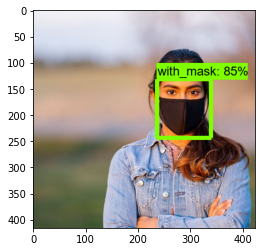

In [47]:
img = '7.jpg'
img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_np = np.array(img)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0))
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
# detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections = {key: value[0,:num_detections].numpy() for key,value in detections.items()}
detections['num_detections'] = num_detections
# print(detections['num_detections'])

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
# print(detections['detection_classes']+label_id_offset)
# print(detections['detection_scores'])
# print(detections['detection_boxes'])
label_id_offset = 0

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
image_np_with_detections,
detections['detection_boxes'],
detections['detection_classes']+label_id_offset,
detections['detection_scores'],
category_index,
use_normalized_coordinates=True,
max_boxes_to_draw=1,
min_score_thresh=.1,
line_thickness=8,
agnostic_mode=False
)
# classes = detections['detection_classes']+label_id_offset
# clas = str(classes[0])
# print(alphabet[clas])
# mytext = alphabet[clas]
# print(mytext)

%matplotlib inline
plt.figure()
plt.imshow(image_np_with_detections)
print('Done')
plt.show()
# plt.show(cv2.resize(image_np_with_detections, (800, 600)))

In [ ]:
 
# #Step 20- Running the Inference.
 
 
# import warnings
# warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
 
# def load_image_into_numpy_array(path):
#     """Load an image from file into a numpy array.
 
#     Puts image into numpy array to feed into tensorflow graph.
#     Note that by convention we put it into a numpy array with shape
#     (height, width, channels), where channels=3 for RGB.
 
#     Args:
#       path: the file path to the image
 
#     Returns:
#       uint8 numpy array with shape (img_height, img_width, 3)
#     """
#     return np.array(Image.open(path))
 
# for image_path in img:
 
#     print('Running inference for {}... '.format(image_path), end='')
#     image_np=load_image_into_numpy_array(image_path)
 
#     # Things to try:
#     # Flip horizontally
#     # image_np = np.fliplr(image_np).copy()
#     # Convert image to grayscale
#     # image_np = np.tile(
#     #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)
 
#     # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
#     input_tensor=tf.convert_to_tensor(image_np,dtype=tf.float32)
#     # The model expects a batch of images, so add an axis with `tf.newaxis`.
#     input_tensor=input_tensor[tf.newaxis, ...]
#     #input_tensor = input_tensor.astype(np.uint8)
#     # input_tensor = np.expand_dims(image_np, 0)
#     detections=detect_fn(input_tensor)
 
#     # All outputs are batches tensors.
#     # Convert to numpy arrays, and take index [0] to remove the batch dimension.
#     # We're only interested in the first num_detections.
#     num_detections=int(detections.pop('num_detections'))
#     detections={key:value[0,:num_detections].numpy()
#                    for key,value in detections.items()}
#     detections['num_detections']=num_detections
 
#     # detection_classes should be ints.
#     detections['detection_classes']=detections['detection_classes'].astype(np.int64)
#     label_id_offset=1
#     image_np_with_detections=image_np.copy()
#     #print(image_np_with_detections)
#     viz_utils.visualize_boxes_and_labels_on_image_array(
#           image_np_with_detections,
#           detections['detection_boxes'],
#           detections['detection_classes']+label_id_offset,
#           detections['detection_scores'],
#           category_index,
#           use_normalized_coordinates=True,
#           #max_boxes_to_draw=1,     #max number of bounding boxes in the image
#           min_score_thresh=.2,      #min prediction threshold
#           agnostic_mode=False)
#     %matplotlib inline
#     plt.figure()
#     plt.imshow(image_np_with_detections)
#     print('Done')
#     plt.show()
 
# #IOU - TO DO

In [28]:
# img = ['1.jpg']